Pruebas estadísticas

In [1]:
norte = read.csv("norte.csv")
sur = read.csv("sur.csv")
norte = norte[1:5000, ]
sur = sur[1:5000, ]

In [3]:
norte$PM10 = as.numeric(norte$PM10)
sur$PM10 = as.numeric(sur$PM10)

In [56]:
# https://stackoverflow.com/q/8047668/3113008
makeTransparent<-function(someColor, alpha=100){
    newColor<-col2rgb(someColor)
    apply(newColor, 2, function(curcoldata){rgb(red=curcoldata[1], green=curcoldata[2],
    blue=curcoldata[3],alpha=alpha, maxColorValue=255)})
}

In [57]:
pdf("boxplots.pdf")
boxplot(norte$PM10, sur$PM10, names = c('Norte', 'Sur'), ylab="μg / m³", ylim=c(30, 800))

# https://stackoverflow.com/a/7237066/3113008
rect(par("usr")[1], -5, par("usr")[2], 50, col = makeTransparent("green"))
rect(par("usr")[1], 50, par("usr")[2], 75, col = makeTransparent("yellow"))
rect(par("usr")[1], 75, par("usr")[2], 155, col = makeTransparent("orange"))
rect(par("usr")[1], 155, par("usr")[2], 235, col = makeTransparent("red"))
rect(par("usr")[1], 235, par("usr")[2], 850, col = makeTransparent("purple"))
legend(1.1, 750, legend=c('Súper mala', 'Muy mala', 'Mala', "Aceptable", "Buena"), cex=1.2, fill= c("purple", "red", "orange", "yellow", "green"))
dev.off()

png 
  2

In [104]:
pdf('norte_hist.pdf')
hist(norte$PM10, xlab="μg / m³", ylab="Frecuencia", cex.lab=1.4, cex.axis=1.4)
dev.off()

pdf('sur_hist.pdf')
hist(sur$PM10, xlab="μg / m³", ylab="Frecuencia", cex.lab=1.4, cex.axis=1.4)
dev.off()

png 
  2

png 
  2

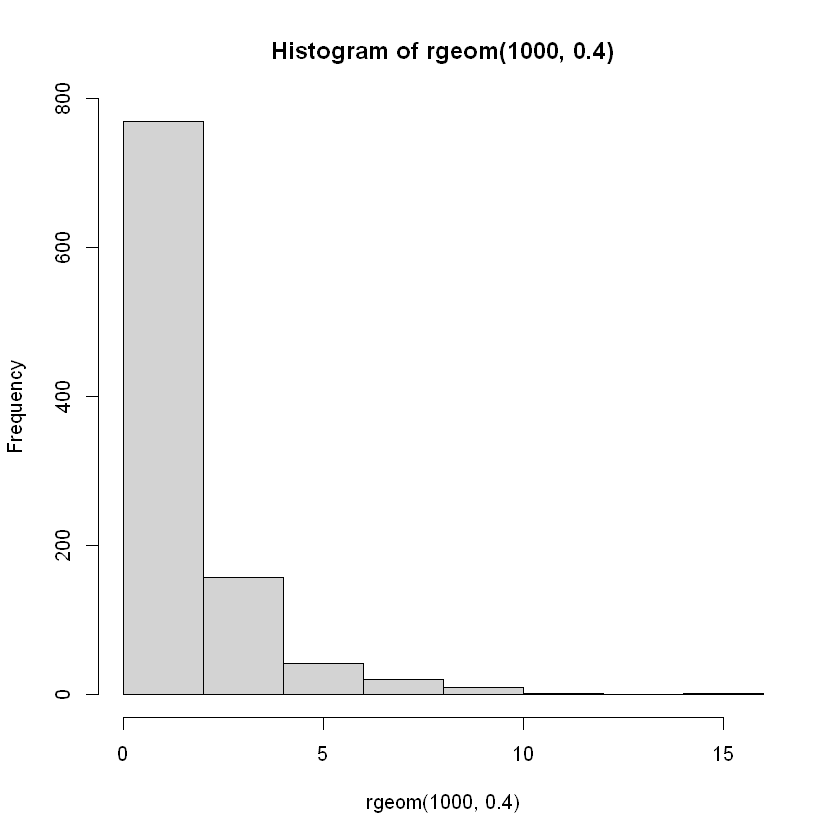

In [101]:
hist(rgeom(1000, 0.4))

In [67]:
shapiro.test(norte$PM10)


	Shapiro-Wilk normality test

data:  norte$PM10
W = 0.85395, p-value < 2.2e-16


In [94]:
shapiro.test(sur$PM10)


	Shapiro-Wilk normality test

data:  sur$PM10
W = 0.74414, p-value < 2.2e-16


In [158]:
wilcox.test(norte$PM10, mu = 50, conf.int = TRUE)


	Wilcoxon signed rank test with continuity correction

data:  norte$PM10
V = 5283830, p-value = 9.868e-15
alternative hypothesis: true location is not equal to 50
95 percent confidence interval:
 46.49998 47.99995
sample estimates:
(pseudo)median 
            47 


In [155]:
wilcox.test(sur$PM10, mu = 50, conf.int = TRUE)


	Wilcoxon signed rank test with continuity correction

data:  sur$PM10
V = 2541067, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 50
95 percent confidence interval:
 33.49993 34.50006
sample estimates:
(pseudo)median 
      33.99993 


In [164]:
wilcox.test(norte$PM10, sur$PM10, paired = TRUE)


	Wilcoxon signed rank test with continuity correction

data:  norte$PM10 and sur$PM10
V = 8687650, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [168]:
ks.test(norte$PM10, sur$PM10)

Warning message in ks.test(norte$PM10, sur$PM10):
"p-value will be approximate in the presence of ties"



	Two-sample Kolmogorov-Smirnov test

data:  norte$PM10 and sur$PM10
D = 0.2628, p-value < 2.2e-16
alternative hypothesis: two-sided


In [172]:
var.test(norte$PM10, sur$PM10)


	F test to compare two variances

data:  norte$PM10 and sur$PM10
F = 1.0533, num df = 4999, denom df = 4999, p-value = 0.06665
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9964437 1.1133053
sample estimates:
ratio of variances 
          1.053255 


In [25]:
cor.test(norte$PM10, sur$PM10)


	Pearson's product-moment correlation

data:  log(norte$PM10) and log(sur$PM10)
t = 4.6531, df = 4998, p-value = 3.354e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03802607 0.09322572
sample estimates:
       cor 
0.06567614 


In [52]:
pdf("scatter.pdf")
plot(log(norte$PM10), log(sur$PM10), pch=19, xlab="Log. valores E. Norte", ylab="Log. valores E. Sur", cex.lab=1.2, cex.axis=1.2)
abline(lm(log(norte$PM10)~log(sur$PM10)), col="red") # regression line (y~x)
legend(4.5, 6.5, legend=c('Correlación'), cex=1.2, fill= c("red"))
dev.off()

png 
  2

In [9]:
library(corrplot)

In [10]:
t = data.frame(norte$PM10, sur$PM10)
t

norte.PM10,sur.PM10
<dbl>,<dbl>
12,16
17,8
8,24
6,8
6,9
6,8
5,7
6,9
9,6


In [18]:
cor(t)

,norte.PM10,sur.PM10
norte.PM10,1.00000000,0.06029067
sur.PM10,0.06029067,1.00000000
